##옵션에 대한 옵션(option on option, compound option)
 콜옵션에 대한 콜옵션(Call on Call)의 가격을 계산합니다. 블랙-숄즈 모델을 사용합니다.

In [2]:
import matplotlib.font_manager as fm

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


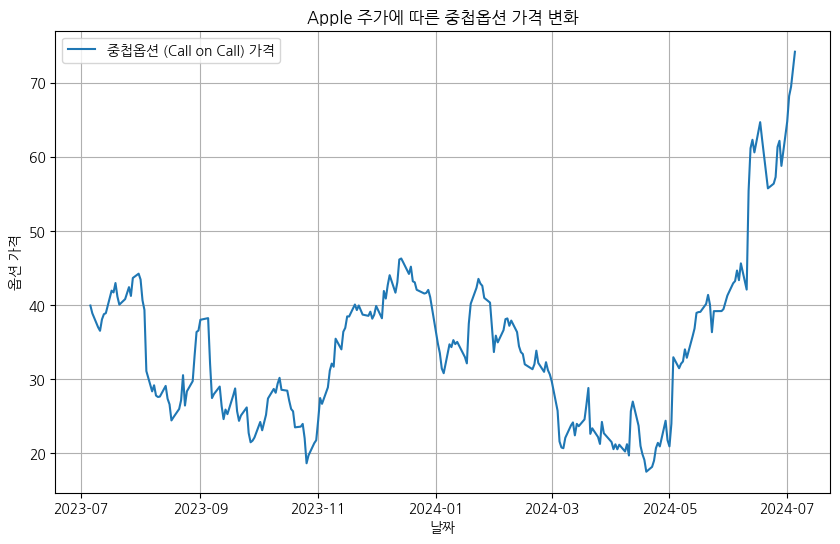

In [3]:
import numpy as np
from scipy.stats import norm
import yfinance as yf
import matplotlib.pyplot as plt

# 블랙-숄즈 모델을 활용한 콜옵션 가격 계산 함수
def call_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# 중첩옵션의 가격 계산 함수 (Call on Call)
def compound_option_price(S, K1, K2, T1, T2, r, sigma, option_type='call'):
    # 첫 번째 옵션 가격 계산 (옵션이 되는 옵션)
    if option_type == 'call':
        option_price = call_option_price(S, K1, T1, r, sigma)

    # 중첩옵션 가격 계산
    compound_price = call_option_price(option_price, K2, T2, r, sigma)

    return compound_price

# 실제 데이터 가져오기
# Apple Inc. 주가 데이터
apple = yf.Ticker("AAPL")
apple_data = apple.history(period="1y")
S_values = apple_data['Close'].values

# 기본 변수 설정
K1 = 150  # 첫 번째 옵션의 행사가격
K2 = 10   # 두 번째 옵션의 행사가격
T1 = 1    # 첫 번째 옵션의 만기 기간 (1년)
T2 = 0.5  # 두 번째 옵션의 만기 기간 (0.5년)
r = 0.05  # 무위험 이자율 (5%)
sigma = np.std(np.log(apple_data['Close'] / apple_data['Close'].shift(1)).dropna()) * np.sqrt(252)  # 기초 자산의 변동성

# 중첩옵션 가격 계산
compound_call_prices = [compound_option_price(S, K1, K2, T1, T2, r, sigma, option_type='call') for S in S_values]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(apple_data.index, compound_call_prices, label='중첩옵션 (Call on Call) 가격')
plt.xlabel('날짜')
plt.ylabel('옵션 가격')
plt.title('Apple 주가에 따른 중첩옵션 가격 변화')
plt.legend()
plt.grid(True)
plt.show()
